# Handover Procedure

A handover process switches between the RAUs as the Pod progresses in the tube to maintain the signal power, quality, and data speeds from deteriorating. The user equipment in the Pod constantly monitors the signal power and quality it receives. Two successive RAUs overlap for a particular region, and the comparison of signal power and quality is performed in this region. If the succeeding RAU has higher power or quality, then the handover procedure is initiated. The Pod 'breaks' the signal from the preceding RAU and 'makes' the signal with succeeding RAU. Although, this process and algorithm does have a fair share of shortcomings. 

## Few Assumptions

The train is moving at constant velocity of _v = 1200 km/hr_ unless specified otherwise. Each _RAU_ (_Ground Station_) is spaced by a distance _d1_. Each _RAU_ covers a radius of _R_. Each _RAU_ overlaps a distance of _d2_. With this assumption, we conclude that the handover process must be triggered before the pod crosses the distance _d2_. So, _D(handover)_ = _d2_ > _v x delta(t)_. Where delta(t) is the time gap at which handover takes place. 
Consider, 
    _d1 = 2km_,
    _R = 1.4km_, 
    _d2 = 0.8km_ (Assuming a perfect circular overlap exactly on top of the tube).
I assume the signal to be LTE (or lower ranges of 5G) bandwidth. 

In [3]:
d2 = 0.8
v = 1200
delta_t = (d2/v)*3600
print("Handover time is:", delta_t, "sec")

Handover time is: 2.4000000000000004 sec


We now assume that the measurements of signal power and quality (_SP_ & _SQ_ respectively) are available at all times during the handover process. An instrument close to the Pod antenna or the User Equipment (UE) inside the pod monitors SP and SQ. A linear drop in signal quality with distance is taken for granted (period.) for simplicity.  

_Scales for reading signal power:_ 
> - greater than -80dB  : Excellent SP with maximum dataspeeds 
> - -80dB to -90dB : Good SP with good dataspeeds 
> - -90dB to -100dB: Might be subjected to dropouts but reliable dataspeeds
> - less that -100dB: No connections

_Scales for reading signal quality:_ 
> - greater than -10dB  : Excellent SQ with maximum dataspeeds 
> - -10dB to -15dB : Good SP with good dataspeeds 
> - -15dB to -20dB: Might be subjected to dropouts but reliable dataspeeds
> - less than -20dB: No connections 

Plotting them - 


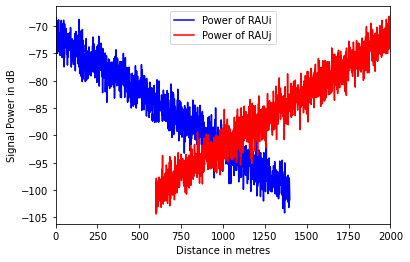

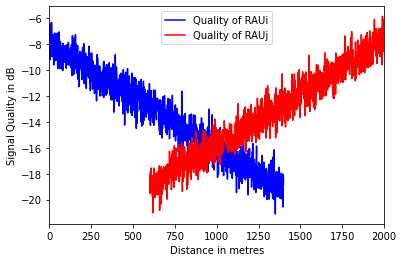

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

def SPi(x): 
    return (-0.02*x - 72)

truePoweri = [SPi(x) for x in range(0, 1400)]
noisePoweri = np.random.normal(0, 2, 1400)
Spi = truePoweri + noisePoweri

def SPj(x): 
    return (0.02*x - 100)

truePowerj = [SPj(x) for x in range(0,1400)]
noisePowerj = np.random.normal(0, 2, 1400)
Spj = truePowerj + noisePowerj 


plt.plot(range(len(Spi)), Spi, label = "Power of RAUi", color = "blue")
plt.plot(range(2000-len(Spj),2000), Spj, label = "Power of RAUj", color = "red")
plt.xlim(0,2000)
plt.xlabel("Distance in metres")
plt.ylabel("Signal Power in dB")
plt.legend()
plt.show()

def SQi(x): 
    return (-0.008*x - 8)

trueQualityi = [SQi(x) for x in range(0, 1400)]
noiseQualityi = np.random.normal(0, 0.8, 1400)
Sqi = trueQualityi + noiseQualityi

def SQj(x): 
    return (0.008*x - 19)

trueQualityj = [SQj(x) for x in range(0, 1400)]
noiseQualityj = np.random.normal(0, 0.8, 1400)
Sqj = trueQualityj + noiseQualityj 


plt.plot(range(len(trueQualityi)), Sqi, label = "Quality of RAUi", color = "blue")
plt.plot(range(2000 - len(trueQualityj), 2000), Sqj, label = "Quality of RAUj", color = "red")
plt.xlim(0,2000)
plt.xlabel("Distance in metres")
plt.ylabel("Signal Quality in dB")
plt.legend()
plt.show()


The above plots do not account for the various losses that occur, such as attenuation, penetration, propagation losses, etc. —a single random noise accounts for all the different noises and losses in the communication system. I intend to incorporate them in detail at a later stage once the basic idea of the handover is complete.

The 'break before make' approach can lead to outage and handover failures. 
State estimation filters assist in knowing the relative position of the Pod w.r.t. the RAUs. This will help reduce false triggers.

The Pod is moving at a constant velocity of 1200km/hr. Therefore, the handover can occur anywhere in the overlapping region (i.e., 0.6 to 1.4km) when the signal/quality of the next RAU is greater than the previous RAU. 

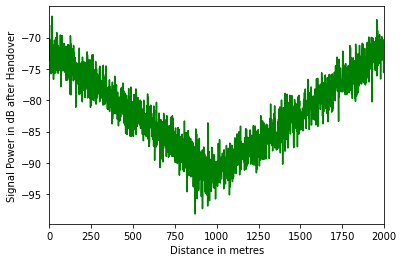

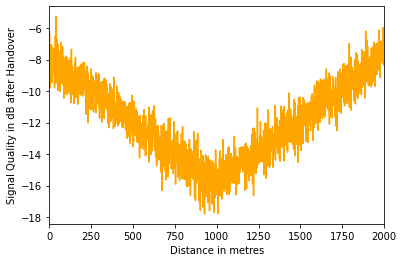

In [55]:
import numpy as np 
import matplotlib.pyplot as plt

def SPi(x): 
    return (-0.02*x - 72)

truePoweri = []
truePoweri = [SPi(x) for x in range(0, 1400)]
truePoweri.extend([-110]*600)
noisePoweri = np.random.normal(0, 2, 2000)
Spi = truePoweri + noisePoweri

def SPj(x): 
    return (0.02*x - 100)

truePowerj = []
truePowerj = [-110]*600
truePowerj_temp = [SPj(x) for x in range(0,1400)]
truePowerj.extend(truePowerj_temp)
noisePowerj = np.random.normal(0, 2, 2000)
Spj = truePowerj + noisePowerj 


def SQi(x): 
    return (-0.008*x - 8)

trueQualityi = []
trueQualityi = [SQi(x) for x in range(0, 1400)]
trueQualityi.extend([-21]*600)
noiseQualityi = np.random.normal(0, 0.8, 2000)
Sqi = trueQualityi + noiseQualityi

def SQj(x): 
    return (0.008*x - 19)

trueQualityj = []
trueQualityj = [-21]*600
trueQualityj_temp = [SQj(x) for x in range(0, 1400)]
trueQualityj.extend(trueQualityj_temp)
noiseQualityj = np.random.normal(0, 0.8, 2000)
Sqj = trueQualityj + noiseQualityj 

userExperiencePower = []
userExperienceQuality = []

def handoverTrigger(x): 
    if((Spi[x] <= Spj[x] or Sqi[x] <= Sqj[x]) and (600 <= x <= 1400)):    
        return True
    else:
        return False
    
for x in range(0, 2000):
    handoverDetails = handoverTrigger(x)
    
    if(x < 600): 
        userExperiencePower.append(Spi[x])
        userExperienceQuality.append(Sqi[x]) 
    elif((not handoverDetails) and 600 <= x <= 1400):
        userExperiencePower.append(Spi[x])
        userExperienceQuality.append(Sqi[x])
    elif(handoverDetails and 600 <= x <= 1400 ):
        userExperiencePower.append(Spj[x])
        userExperienceQuality.append(Sqj[x])
    elif(x > 1400):
        userExperiencePower.append(Spj[x])
        userExperienceQuality.append(Sqj[x])

plt.plot(range(0,2000), userExperiencePower, label = "User Experience Power", color = "green")
plt.xlim(0,2000)
plt.xlabel("Distance in metres")
plt.ylabel("Signal Power in dB after Handover")
plt.show()
plt.plot(range(0,2000), userExperienceQuality, label = "User Experience Quality", color = "orange")
plt.xlim(0,2000)
plt.xlabel("Distance in metres")
plt.ylabel("Signal Quality in dB after Handover")
plt.show()

Accounting for the attenuation and propogation losses from the paper _"Concepts of Hyperloop Wireless Communication at 1200 km/h: 5G, Wi-Fi, Propagation, Doppler and Handover"_. 

The width, hieght and diameter of the Hyperloop tube:- _a = b = D = 4m._ <br>
The frequency considered is:- _f =2.5GHz._ <br>
The tunnel walls are assumed to be made with concrete:- _dielectric constant er = 5 & conductivity sigma = 10^(-3)_. <br> 
Only lower order modes are considered for attenuations because of the relatively large distance:- _(m, n) = (1, 1)_. <br>

Considering the above parameters, we can proceed to model the losses-

(Not sure if this is one bit correct lol, so I chose to model another path loss in the following cells) 

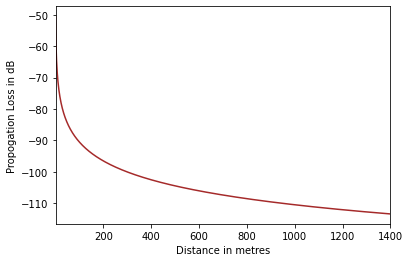

In [18]:
import cmath
import math as m

complexPermittivity = complex(5, 60*0.11991698*(10**-3))
temp1 = 1/((complexPermittivity - 1)**0.5)
temp2 = complexPermittivity/((complexPermittivity - 1)**0.5)

attenuationLoss = (((3*10**8)**2)*temp1.real*2)/((4**3)*((5*10**9)**2)) + (((3*10**8)**2)*temp2.real*2)/((4**3)*(5*10**9)**2)

propLoss = [20*m.log10(8.86*attenuationLoss/x) for x in range(1,1400)]

plt.plot(range(1,1400), propLoss, color = "brown")
plt.xlim(1,1400)
plt.xlabel("Distance in metres")
plt.ylabel("Propogation Loss in dB")
plt.show()

The proposed path loss model is based on a log-normal shadowing. 

**PL = PL0 + 10Ylog10(d/d0) + Xg**

>Where, <br>
PL0 is the path loss in decibels (dB) at the reference distance d0 calculated using the Friis free-space path loss model.<br>
Y is the path loss exponent.<br>
d0 is the reference length. <br>
Xg is a zero-mean Gaussian distributed random variable describing the random shadowing.<br>

Consider, <br>
The reference distance as _d0 = 400m._ <br>
A hard partition (concrete) gives _Y ~ 3.0_ <br>
The standard deviation for this partition is _sigma = 7.0dB_ <br>
The mean of the distribution is _0_. <br>


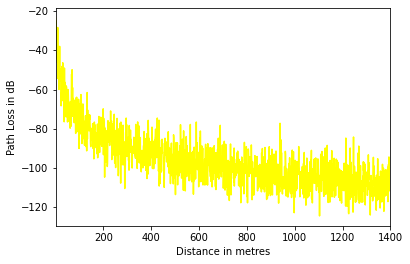

In [47]:
import math as m
import numpy as np

PL0 = 20*m.log10((4*3.14*400*(2.5*10**9))/(3*10**8))

PL = [-(PL0 + 10*3*m.log10(x/400) + np.random.normal(0, 7, 1)) for x in range(1,1400)]

plt.plot(range(1,1400), PL, color = "yellow")
plt.xlim(1,1400)
plt.xlabel("Distance in metres")
plt.ylabel("Path Loss in dB")
plt.show()